In [1]:
# import system libs
import time
import shutil
import pathlib
import itertools
# import data handling tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [2]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image

#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

from keras.applications.mobilenet_v3 import MobileNetV3
from keras.applications.mobilenet_v3 import preprocess_input

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

from keras import metrics
from keras import Model, layers
from keras.callbacks import *
from keras.models import load_model, model_from_json

In [3]:
parasitized_data = os.listdir('E:/Personal Files/Dr. Shafique Awan/Thesis/malaria-parasite-detection/cell-images-for-detecting-malaria/cell_images/Parasitized/')
uninfected_data = os.listdir('E:/Personal Files/Dr. Shafique Awan/Thesis/malaria-parasite-detection/cell-images-for-detecting-malaria/cell_images/Uninfected/')
#print(parasitized_data)

Images of malaria infected cells


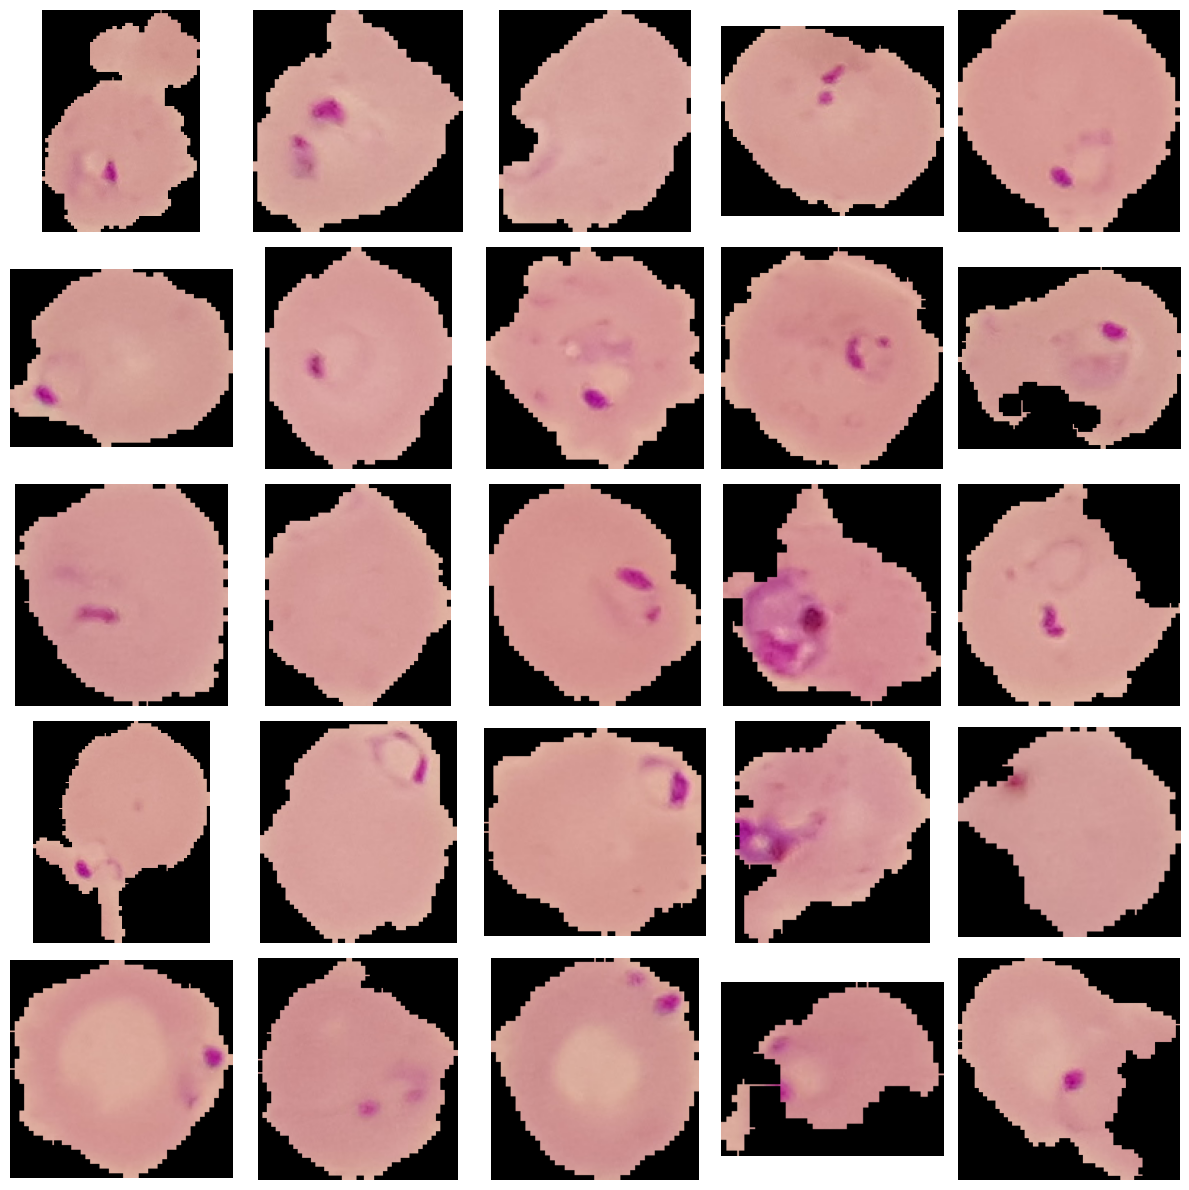

In [4]:
def plotImages(title,directory):
    print(title)
    plt.figure(figsize = (12,12))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        img = cv2.imread( directory+ "/" + parasitized_data[i])
        #print(img)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
        plt.axis('off')
        plt.tight_layout()
    plt.show()
        
plotImages("Images of malaria infected cells","E:/Personal Files/Dr. Shafique Awan/Thesis/malaria-parasite-detection/cell-images-for-detecting-malaria/cell_images/Parasitized") 

Images of Uninfected cells


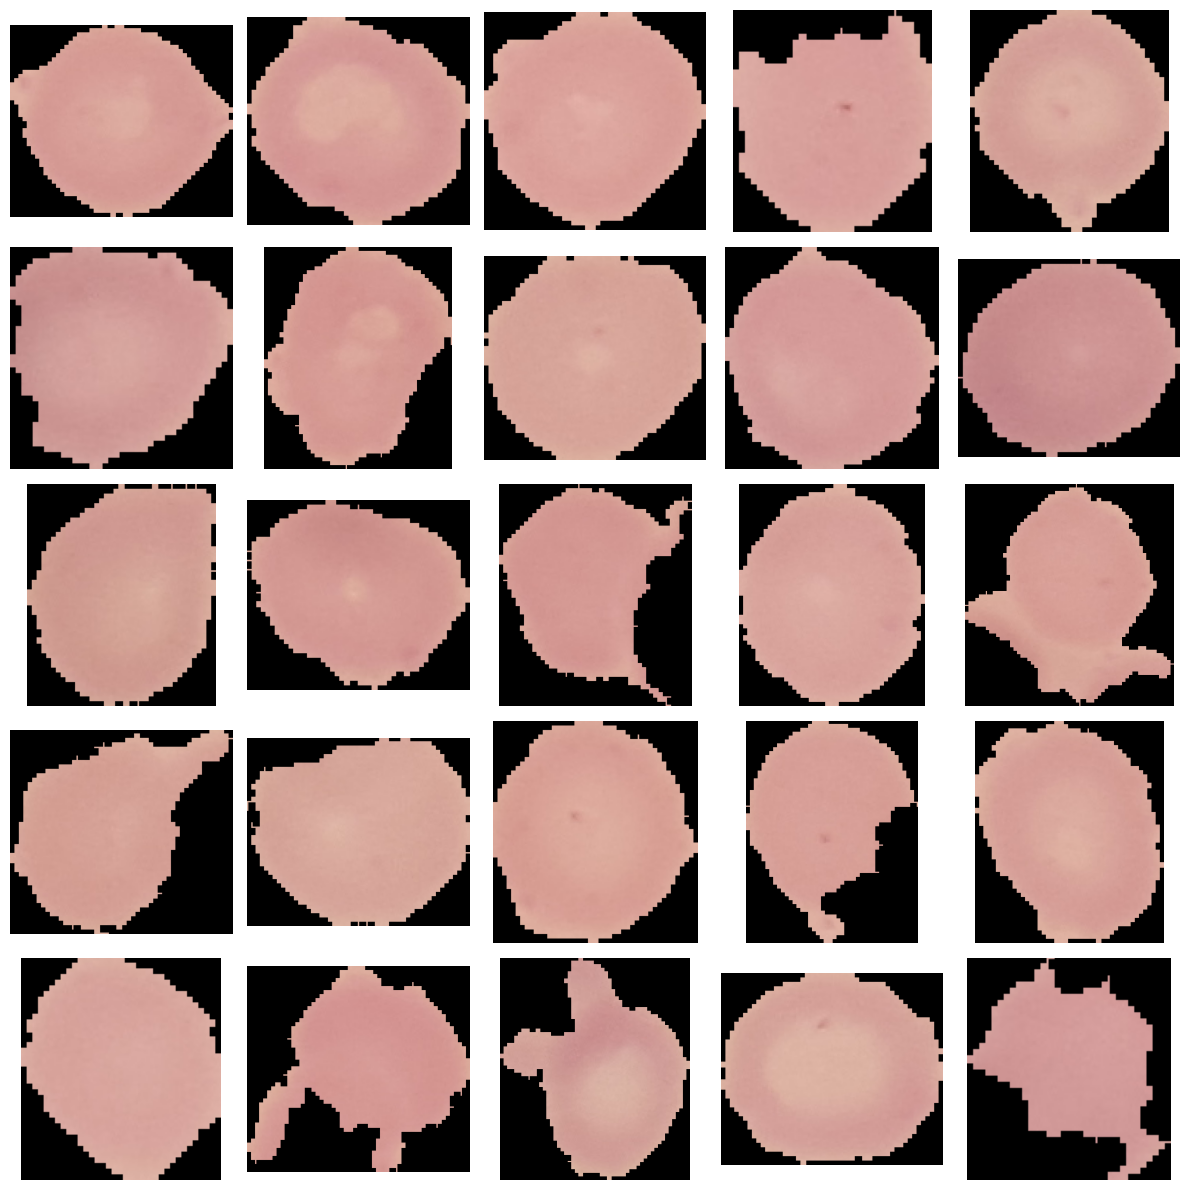

In [5]:
def plotImages(title,directory):
    print(title)
    plt.figure(figsize = (12,12))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        img = cv2.imread( directory+ "/" + uninfected_data[i])
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.axis('off')
        plt.tight_layout()
    plt.show()
        
plotImages("Images of Uninfected cells","E:/Personal Files/Dr. Shafique Awan/Thesis/malaria-parasite-detection/cell-images-for-detecting-malaria/cell_images/Uninfected") 

In [6]:
workingDir = "E:/Personal Files/Dr. Shafique Awan/Thesis/malaria-parasite-detection/cell-images-for-detecting-malaria/"

PATH = os.path.sep.join([workingDir, "cell_images"])

# Getting the path ot the training directory 
train_dir = os.path.join(workingDir, "cell_images")

# Getting the path to the validation directory 
validation_dir = os.path.join(workingDir, "cell_images")

In [7]:
parasitized_train_dir = os.path.join(train_dir, "Parasitized")
uninfected_train_dir = os.path.join(train_dir, "Uninfected")

print(parasitized_train_dir)
# Getting the path to the directory for the parasitized validation cell images and 
# the path to the directory for the uninfected validation cell images 
parasitized_val_dir = os.path.join(validation_dir, "Parasitized") 
uninfected_val_dir = os.path.join(validation_dir, "Uninfected")

E:/Personal Files/Dr. Shafique Awan/Thesis/malaria-parasite-detection/cell-images-for-detecting-malaria/cell_images\Parasitized


In [8]:
# Getting the number of images present in the parasitized training directory and the 
# number of images present in the uninfected training directory 
parasitized_images = len(os.listdir(parasitized_train_dir))
uninfected_images = len(os.listdir(uninfected_train_dir))

# Getting the number of images present in the parasitized validation directory and the 
# number of images present in the uninfected validation directory 
parasitized_images_val = len(os.listdir(parasitized_val_dir)) 
uninfected_images_val = len(os.listdir(uninfected_val_dir)) 

# Getting the sum of both the training images and validation images 
total_train = parasitized_images + uninfected_images  
total_val = parasitized_images_val + uninfected_images_val 

# Displaying the results for Training images  
print("Total Training parasitized images: {}".format(parasitized_images)); 
print("Total Training uninfected images: {}".format(uninfected_images)); 
print("__________________________________________________________________________________________________________\n");

# Displaying the results for Validation images  
print("Total Validation parasitized images: {}".format(parasitized_images_val)); 
print("Total Validation uninfected images: {}".format(uninfected_images_val)); 
print("__________________________________________________________________________________________________________\n"); 

# Displaying the total values for the images in both the training and validation directory 
print("Total Train: {}".format(total_train)); 
print("Total Validation: {}".format(total_val)); 

Total Training parasitized images: 12546
Total Training uninfected images: 12454
__________________________________________________________________________________________________________

Total Validation parasitized images: 12546
Total Validation uninfected images: 12454
__________________________________________________________________________________________________________

Total Train: 25000
Total Validation: 25000


In [9]:
batch_size = 128
epochs = 20 
IMG_HEIGHT = 110 
IMG_WIDTH = 110

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                    #color_mode="grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    shuffle = True
                                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(directory = validation_dir,
                                                  target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                 # color_mode="grayscale",
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                  shuffle = True
                                                 )

Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [11]:
from keras import layers
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import AveragePooling2D
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.models import Model
from keras.regularizers import l2


def conv2d_bn(x, filters, kernel_size, weight_decay=.0, strides=(1, 1)):
    layer = Conv2D(filters=filters,
                   kernel_size=kernel_size,
                   strides=strides,
                   padding='same',
                   use_bias=False,
                   kernel_regularizer=l2(weight_decay)
                   )(x)
    layer = BatchNormalization()(layer)
    return layer


def conv2d_bn_relu(x, filters, kernel_size, weight_decay=.0, strides=(1, 1)):
    layer = conv2d_bn(x, filters, kernel_size, weight_decay, strides)
    layer = Activation('relu')(layer)
    return layer


def ResidualBlock(x, filters, kernel_size, weight_decay, downsample=True):
    if downsample:
        # residual_x = conv2d_bn_relu(x, filters, kernel_size=1, strides=2)
        residual_x = conv2d_bn(x, filters, kernel_size=1, strides=2)
        stride = 2
    else:
        residual_x = x
        stride = 1
    residual = conv2d_bn_relu(x,
                              filters=filters,
                              kernel_size=kernel_size,
                              weight_decay=weight_decay,
                              strides=stride,
                              )
    residual = conv2d_bn(residual,
                         filters=filters,
                         kernel_size=kernel_size,
                         weight_decay=weight_decay,
                         strides=1,
                         )
    out = layers.add([residual_x, residual])
    out = Activation('relu')(out)
    return out


def ResNet18(classes, input_shape, weight_decay=1e-4):
    input = Input(shape=input_shape)
    x = input
    # x = conv2d_bn_relu(x, filters=64, kernel_size=(7, 7), weight_decay=weight_decay, strides=(2, 2))
    # x = MaxPool2D(pool_size=(3, 3), strides=(2, 2),  padding='same')(x)
    x = conv2d_bn_relu(x, filters=64, kernel_size=(3, 3), weight_decay=weight_decay, strides=(1, 1))

    # # conv 2
    x = ResidualBlock(x, filters=64, kernel_size=(3, 3), weight_decay=weight_decay, downsample=False)
    x = ResidualBlock(x, filters=64, kernel_size=(3, 3), weight_decay=weight_decay, downsample=False)
    # # conv 3
    x = ResidualBlock(x, filters=128, kernel_size=(3, 3), weight_decay=weight_decay, downsample=True)
    x = ResidualBlock(x, filters=128, kernel_size=(3, 3), weight_decay=weight_decay, downsample=False)
    # # conv 4
    x = ResidualBlock(x, filters=256, kernel_size=(3, 3), weight_decay=weight_decay, downsample=True)
    x = ResidualBlock(x, filters=256, kernel_size=(3, 3), weight_decay=weight_decay, downsample=False)
    # # conv 5
    x = ResidualBlock(x, filters=512, kernel_size=(3, 3), weight_decay=weight_decay, downsample=True)
    x = ResidualBlock(x, filters=512, kernel_size=(3, 3), weight_decay=weight_decay, downsample=False)
    x = AveragePooling2D(pool_size=(4, 4), padding='valid')(x)
    x = Flatten()(x)
    x = Dense(classes, activation='sigmoid')(x)
    model = Model(input, x, name='ResNet18')
    return model


In [12]:
from keras import losses
from keras import optimizers

weight_decay = 1e-4
lr = 1e-1
num_classes = 1
resnet18 = ResNet18(input_shape=(110, 110, 3), classes=num_classes, weight_decay=weight_decay)
opt = optimizers.Adam(learning_rate=lr)
resnet18.compile(optimizer=opt,
                 loss=losses.binary_crossentropy,
                 metrics=['accuracy'])
resnet18.summary()

Model: "ResNet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 110, 110, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 110, 110, 64  1728        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 110, 110, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                          

                                                                                                  
 activation_7 (Activation)      (None, 55, 55, 128)  0           ['batch_normalization_8[0][0]']  
                                                                                                  
 conv2d_9 (Conv2D)              (None, 55, 55, 128)  147456      ['activation_7[0][0]']           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 55, 55, 128)  512        ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 add_3 (Add)                    (None, 55, 55, 128)  0           ['activation_6[0][0]',           
                                                                  'batch_normalization_9[0][0]']  
          

 batch_normalization_19 (BatchN  (None, 14, 14, 512)  2048       ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 512)  0           ['activation_14[0][0]',          
                                                                  'batch_normalization_19[0][0]'] 
                                                                                                  
 activation_16 (Activation)     (None, 14, 14, 512)  0           ['add_7[0][0]']                  
                                                                                                  
 average_pooling2d (AveragePool  (None, 3, 3, 512)   0           ['activation_16[0][0]']          
 ing2D)                                                                                           
          

In [ ]:
# Training the model on the input data by using the fit_generator function 
history = resnet18.fit_generator(train_generator, steps_per_epoch = total_train // batch_size, 
                       epochs = epochs, 
                       validation_data = validation_generator, 
                       validation_steps = total_val // batch_size) 

Epoch 1/20
195/195 [==============================] - 9336s 48s/step - loss: 4.0799 - accuracy: 0.6290 - val_loss: 125.9660 - val_accuracy: 0.4983
Epoch 2/20
195/195 [==============================] - 8665s 44s/step - loss: 3.0898 - accuracy: 0.7306 - val_loss: 3.0716 - val_accuracy: 0.6342
Epoch 3/20
195/195 [==============================] - 33836s 174s/step - loss: 2.5894 - accuracy: 0.9136 - val_loss: 2.5767 - val_accuracy: 0.8919
Epoch 4/20
195/195 [==============================] - 16760s 86s/step - loss: 2.3374 - accuracy: 0.9468 - val_loss: 2.2867 - val_accuracy: 0.9306
Epoch 5/20
195/195 [==============================] - 10043s 52s/step - loss: 2.1591 - accuracy: 0.9526 - val_loss: 2.1225 - val_accuracy: 0.9330
Epoch 6/20
195/195 [==============================] - 9969s 51s/step - loss: 2.0078 - accuracy: 0.9522 - val_loss: 1.9704 - val_accuracy: 0.9473
Epoch 7/20
 91/195 [=============>................] - ETA: 1:12:29 - loss: 1.8974 - accuracy: 0.9548

In [68]:
#ResNet50V2 pre-trained model

from keras.applications.resnet_v2 import ResNet50V2
image_input_shape = Input(shape=(110, 110, 3))
resnetv2 = ResNet50V2(input_tensor=image_input_shape, include_top=False, weights='imagenet')

In [69]:
# do not train the existing weights
for layer in resnetv2.layers:
    layer.trainable = False

# defining input and output to the model
x = Flatten()(resnetv2.output)
prediction = Dense(1, activation='sigmoid')(x)

In [71]:
model = Model(inputs = resnetv2.input, outputs = prediction)
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 110, 110, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 116, 116, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 55, 55, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 57, 57, 64)   0           ['conv1_conv[0][0]']       

 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 28, 28, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 28, 28, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 28, 28, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 14, 14, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 14, 14, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_out (Add)         (None, 14, 14, 512)  0           ['conv3_block1_out[0][0]',       
          

 conv4_block1_1_conv (Conv2D)   (None, 7, 7, 256)    131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 7, 7, 256)   1024        ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 9, 9, 256)   0           ['conv4_block1_1_relu[0][0]']    
 g2D)     

 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block3_2_relu[0][0]']    
                                                                                                  
 conv4_block3_out (Add)         (None, 7, 7, 1024)   0           ['conv4_block2_out[0][0]',       
                                                                  'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_block4_preact_bn (BatchN  (None, 7, 7, 1024)  4096        ['conv4_block3_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 9, 9, 256)   0           ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 4, 4, 256)    589824      ['conv4_block6_2_pad[0][0]']     
                                                                                                  
 conv4_block6_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block6_2_bn[0][0]']      
 n)       

                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 4, 4, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 4, 4, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 4, 4, 512)    1048576     ['conv5_block3_preact_relu[0][0]'
                                                                 ]                                
          

In [72]:
# tell the model what cost and optimization method to use
metrics = ['accuracy']
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=metrics
)

In [73]:
# Training the model on the input data by using the fit_generator function 
history = model.fit_generator(train_generator, steps_per_epoch = total_train // batch_size, 
                       epochs = epochs, 
                       validation_data = validation_generator, 
                       validation_steps = total_val // batch_size) 

Epoch 1/20
195/195 [==============================] - 1063s 5s/step - loss: 0.4561 - accuracy: 0.8738 - val_loss: 0.2173 - val_accuracy: 0.9186
Epoch 2/20
195/195 [==============================] - 793s 4s/step - loss: 0.2845 - accuracy: 0.9067 - val_loss: 0.3660 - val_accuracy: 0.8921
Epoch 3/20
195/195 [==============================] - 644s 3s/step - loss: 0.2475 - accuracy: 0.9159 - val_loss: 0.2291 - val_accuracy: 0.9161
Epoch 4/20
195/195 [==============================] - 652s 3s/step - loss: 0.2641 - accuracy: 0.9169 - val_loss: 0.2288 - val_accuracy: 0.9293
Epoch 5/20
195/195 [==============================] - 644s 3s/step - loss: 0.2562 - accuracy: 0.9187 - val_loss: 0.1995 - val_accuracy: 0.9336
Epoch 6/20
195/195 [==============================] - 633s 3s/step - loss: 0.2614 - accuracy: 0.9204 - val_loss: 0.1814 - val_accuracy: 0.9386
Epoch 7/20
195/195 [==============================] - 672s 3s/step - loss: 0.2488 - accuracy: 0.9229 - val_loss: 0.2094 - val_accuracy: 0.927

In [ ]:
#MobileNetV2 pre-trained model

moblieNetV2 = MobileNetV2(
    input_shape=[IMG_HEIGHT, IMG_WIDTH] + [1],
    alpha=1.0,
    include_top=False,
    weights="imagenet")

# do not train the existing weights
for layer in moblieNetV2.layers:
    layer.trainable = False

# defining input and output to the model
x = Flatten()(moblieNetV2.output)
prediction = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs = moblieNetV2.input, outputs = prediction)
# view the structure of the model
model.summary()

In [ ]:
# tell the model what cost and optimization method to use

metrics = ['accuracy']

model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=metrics
)

In [ ]:
# Training the model on the input data by using the fit_generator function 
history = model.fit_generator(train_generator, steps_per_epoch = total_train // batch_size, 
                       epochs = epochs, 
                       validation_data = validation_generator, 
                       validation_steps = total_val // batch_size) 

In [ ]:
#InceptionV3 pre-trained model

inceptionV3=InceptionV3(input_shape=[IMG_HEIGHT, IMG_WIDTH] + [1],
    include_top=False,
    weights="imagenet")

# do not train the existing weights
for layer in inceptionV3.layers:
    layer.trainable = False

# defining input and output to the model
x = Flatten()(inceptionV3.output)
prediction = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs = inceptionV3.input, outputs = prediction)
# view the structure of the model
model.summary()

In [ ]:
# tell the model what cost and optimization method to use

metrics = ['accuracy']
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=metrics
)

In [ ]:
# Training the model on the input data by using the fit_generator function 
history = model.fit_generator(train_generator, steps_per_epoch = total_train // batch_size, 
                       epochs = epochs, 
                       validation_data = validation_generator, 
                       validation_steps = total_val // batch_size) 

In [31]:
# # instantiating the VGG19 model
# vgg19 = VGG19(input_shape=[IMG_HEIGHT, IMG_WIDTH] + [3],
#                   weights='imagenet', # include the pre-trained weights on ImageNet
#                   include_top=False)  # to use our own input and get the desired output

# # do not train the existing weights
# for layer in vgg19.layers:
#     layer.trainable = False

# # defining input and output to the model
# x = Flatten()(vgg19.output)
# prediction = Dense(1, activation='sigmoid')(x)

In [30]:
# # create a model object
# model = Model(inputs = vgg19.input, outputs = prediction)

# # view the structure of the model
# model.summary()

In [32]:
# # tell the model what cost and optimization method to use

# metrics = ['accuracy',
#            metrics.Precision(name='precision'),
#            metrics.Recall(name='recall')
#           ]

# model.compile(
#   loss='binary_crossentropy',
#   optimizer='adam',
#   metrics=metrics
# )

In [33]:
# # Training the model on the input data by using the fit_generator function 
# history = model.fit_generator(train_generator, steps_per_epoch = total_train // batch_size, 
#                        epochs = epochs, 
#                        validation_data = validation_generator, 
#                        validation_steps = total_val // batch_size) 

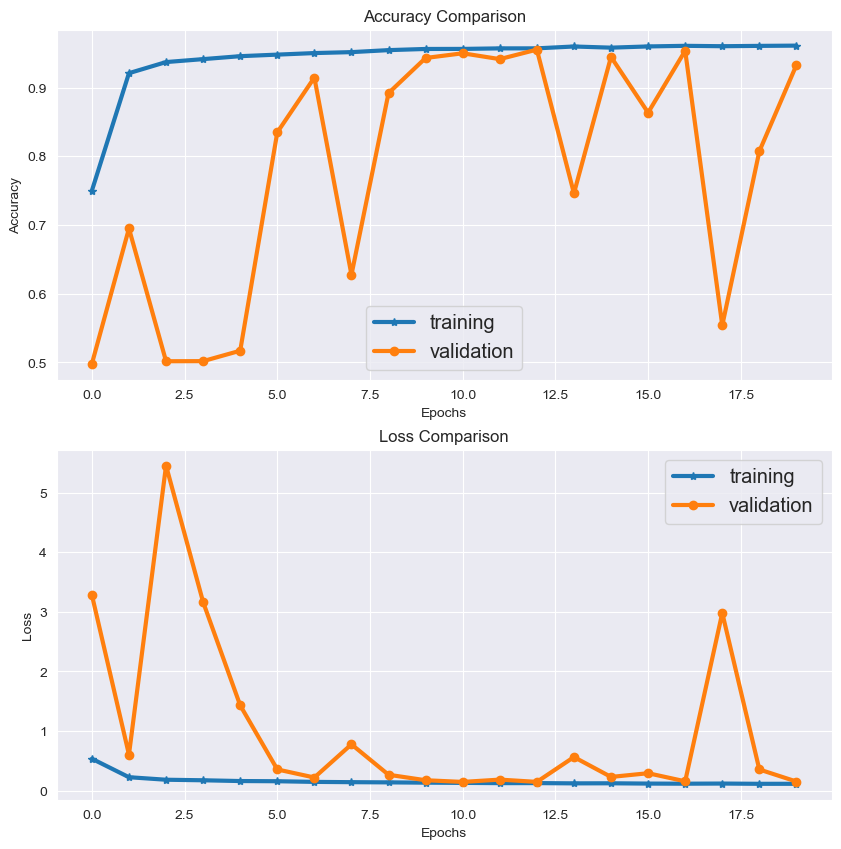

In [34]:
def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(fontsize = 'x-large')
    

    plt.subplot(2,1,2)
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.grid(True)
    plt.show()


visualize_training(history)

In [35]:
model_test_performace = model.evaluate(validation_generator)

98/98 [==============================] - 866s 9s/step - loss: 0.1512 - accuracy: 0.9327


In [36]:
# Saving the model for further uses 
modelName = "MalariaModel.h5" 
model.save_weights(modelName); 

In [96]:
img = "E:/Personal Files/Dr. Shafique Awan/Thesis/malaria-parasite-detection/test/test/test1"

# Getting the first Four images 
ImgDir = list(os.listdir(img)) 
ImgDir = ImgDir[:3] 

# Loading Just a random image from the Parasitized images folder. 
imagePath = os.path.join(img, "C39P4thinF_original_IMG_20150622_105803_cell_103.png")

# Displaying the full path to the parasitized image we want to use for prediction. 
print(imagePath)

E:/Personal Files/Dr. Shafique Awan/Thesis/malaria-parasite-detection/test/test/test1\C39P4thinF_original_IMG_20150622_105803_cell_103.png


Loaded Image Shape: (127, 115, 3)


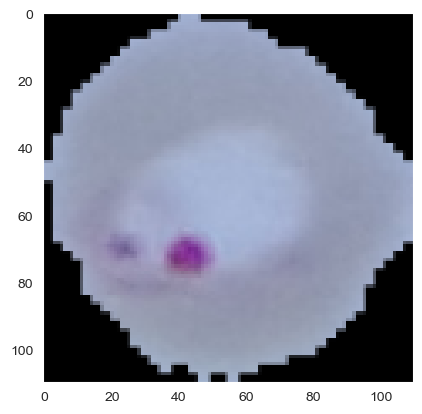

1/1 [==============================] - 34s 34s/step
The Predicted Class is: Uninfected


In [97]:
img = cv2.imread(imagePath); 

# Setting the dimensions for the loaded image to be converted into and displaying the shape of the image 
print("Loaded Image Shape: {}".format(img.shape)); 
dim = (IMG_HEIGHT, IMG_WIDTH); 

# Resizing the image 
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA); 
plt.grid(False) 
plt.imshow(img) 
plt.show() 

# Expanding the image dimensions 
image = np.expand_dims(img, axis = 0); 

# Making Final Predictions 
result = model.predict(image)
# Creating a loop to get the actual predicted class 
for key, value in (train_generator.class_indices.items()): 
    if value == result: 
        print("The Predicted Class is: {}".format(key))